In [2]:
from google.colab import files
files.upload()


Saving result_nopilot1.csv to result_nopilot1.csv


{'result_nopilot1.csv': b',Mnemonic Code,Day of Confirmation Date,Bookings,Booking Status,Week_Number,year\r\n0,AUSVZ,2018-01-11,6,Confirmed,2,2018\r\n1,WDCDP,2018-01-11,9,Confirmed,2,2018\r\n2,SBAGG,2018-01-11,1,Confirmed,2,2018\r\n3,SABCN,2018-01-11,3,Confirmed,2,2018\r\n5,SABCN,2018-01-11,1,Cancelled,2,2018\r\n6,PHXPX,2018-01-11,5,Confirmed,2,2018\r\n14,PDXPM,2018-01-12,11,Confirmed,2,2018\r\n17,CLTKM,2018-01-12,13,Confirmed,2,2018\r\n18,MIAEP,2018-01-11,9,Confirmed,2,2018\r\n19,NTCME,2018-01-11,16,Cancelled,2,2018\r\n28,PDXPM,2018-01-13,17,Cancelled,2,2018\r\n29,PDXPM,2018-01-11,8,Confirmed,2,2018\r\n30,PDXPM,2018-01-13,31,Confirmed,2,2018\r\n33,PDXVP,2018-01-13,39,Confirmed,2,2018\r\n34,PITHM,2018-01-12,3,Confirmed,2,2018\r\n36,PHLPP,2018-01-11,2,Cancelled,2,2018\r\n37,PHLPP,2018-01-12,2,Confirmed,2,2018\r\n40,ORDTG,2018-01-13,6,Confirmed,2,2018\r\n42,ORDAL,2018-01-12,26,Confirmed,2,2018\r\n47,PITHM,2018-01-13,75,Confirmed,2,2018\r\n57,ORDAL,2018-01-11,13,Confirmed,2,2018\r\n61,SB

In [17]:

result_nopilot = pd.read_csv('result_nopilot1.csv')
result_nopilot['Mnemonic Code'] = result_nopilot['Mnemonic Code'].replace({'VRB':'MIAVB', 'EPC':'MIAEP','ANG':'MIAAG','EVT':'NYCAA',
      'MSE':'NTCME','LAP':'LAXWE','HWL':'LAXWM','TMO':'SFOBC'})
result_nopilot.info()
result_nopilot['Day of Confirmation Date'] = pd.to_datetime(result_nopilot['Day of Confirmation Date'], errors='coerce')

result_nopilot=result_nopilot.sort_values(['Day of Confirmation Date'])
result_nopilot['month_year'] = result_nopilot['Day of Confirmation Date'].dt.to_period('M') 
result_nopilot['Total_Bookings']=result_nopilot.groupby(['Mnemonic Code','month_year','Booking Status'])['Bookings'].transform('sum')
result_nopilot.info()

Forecast1=result_nopilot.drop(['Day of Confirmation Date',
       'Bookings','Week_Number','year'], axis=1)
Forecast1=Forecast1.drop_duplicates()


MIAVB=Forecast1[Forecast1['Mnemonic Code'].str.contains("MIAVB")]
MIAVB_Confirm=MIAVB[MIAVB['Booking Status'].str.contains("Confirmed")]
MIAVB_Confirm=MIAVB_Confirm.drop(['Mnemonic Code',
       'Booking Status'], axis=1)
MIAVB_Confirm.info()
MIAVB_Confirm.set_index('month_year', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95332 entries, 0 to 95331
Data columns (total 7 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null object
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95332 entries, 37125 to 34625
Data columns (total 9 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null datetime64[ns]
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
month_year                  95

In [0]:
MIAVB_Confirm['month'] = MIAVB_Confirm.index
MIAVB_Confirm=MIAVB_Confirm.drop(['Unnamed: 0'], axis=1)



In [21]:
MIAVB_Confirm=MIAVB_Confirm.drop_duplicates()

MIAVB_Confirm=MIAVB_Confirm.drop(['month'], axis=1)
MIAVB_Confirm

Total_Bookings
month_year                
2016-01                 25
2016-02                 88
2016-03                 41
2016-04                 86
2016-05                 28
2016-06                 48
2016-07                 49
2016-08                 47
2016-09                 49
2016-10                 34
2016-11                 27
2016-12                 39
2017-01                 64
2017-02                 37
2017-03                 43
2017-04                 40
2017-05                 49
2017-06                 98
2017-07                 73
2017-08                 73
2017-09                 99
2017-10                 56
2017-11                 85
2017-12                 42
2018-01                 52
2018-02                 32
2018-03                 28
2018-04                 18
2018-05                 39
2018-06                 29
2018-07                 40
2018-08                 24
2018-09                 16
2018-10                 25
2018-11                 23
2018-12                 31
2019-01                 35
2019-02                 29
2019-03                 35
2019-04                 10

In [3]:

import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
result_nopilot = pd.read_csv('result_nopilot1.csv')
result_nopilot['Mnemonic Code'] = result_nopilot['Mnemonic Code'].replace({'VRB':'MIAVB', 'EPC':'MIAEP','ANG':'MIAAG','EVT':'NYCAA',
      'MSE':'NTCME','LAP':'LAXWE','HWL':'LAXWM','TMO':'SFOBC'})
result_nopilot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95332 entries, 0 to 95331
Data columns (total 7 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null object
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.1+ MB


In [4]:
MIAVB_Confirm.info()

NameError: ignored

In [0]:
result_nopilot['Day of Confirmation Date'] = pd.to_datetime(result_nopilot['Day of Confirmation Date'], errors='coerce')



In [6]:
result_nopilot=result_nopilot.sort_values(['Day of Confirmation Date'])
result_nopilot['month_year'] = result_nopilot['Day of Confirmation Date'].dt.to_period('M') 
result_nopilot['Total_Bookings']=result_nopilot.groupby(['Mnemonic Code','month_year','Booking Status'])['Bookings'].transform('sum')
result_nopilot.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 95332 entries, 37125 to 34625
Data columns (total 9 columns):
Unnamed: 0                  95332 non-null int64
Mnemonic Code               95332 non-null object
Day of Confirmation Date    95332 non-null datetime64[ns]
Bookings                    95332 non-null int64
Booking Status              95332 non-null object
Week_Number                 95332 non-null int64
year                        95332 non-null int64
month_year                  95332 non-null period[M]
Total_Bookings              95332 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2), period[M](1)
memory usage: 7.3+ MB


In [0]:
Forecast1=result_nopilot.drop(['Day of Confirmation Date',
       'Bookings','Week_Number','year'], axis=1)
Forecast1=Forecast1.drop_duplicates()




In [0]:
MIAVB=Forecast1[Forecast1['Mnemonic Code'].str.contains("MIAVB")]
MIAVB_Confirm=MIAVB[MIAVB['Booking Status'].str.contains("Confirmed")]
MIAVB_Confirm=MIAVB_Confirm.drop(['Mnemonic Code',
       'Booking Status'], axis=1)


In [9]:
MIAVB_Confirm.set_index('month_year', inplace=True)
MIAVB_Confirm.info()



<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 810 entries, 2016-01 to 2019-04
Freq: M
Data columns (total 2 columns):
Unnamed: 0        810 non-null int64
Total_Bookings    810 non-null int64
dtypes: int64(2)
memory usage: 19.0 KB


In [0]:

MIAVB_Confirm=MIAVB_Confirm.drop(['Unnamed: 0'], axis=1)

In [11]:
MIAVB_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 810 entries, 2016-01 to 2019-04
Freq: M
Data columns (total 1 columns):
Total_Bookings    810 non-null int64
dtypes: int64(1)
memory usage: 12.7 KB


In [14]:
MIAVB_Confirm

Total_Bookings
month_year                
2016-01                 25
2016-02                 88
2016-03                 41
2016-04                 86
2016-05                 28
2016-06                 48
2016-07                 49
2016-08                 47
2016-10                 34
2016-11                 27
2016-12                 39
2017-01                 64
2017-02                 37
2017-03                 43
2017-04                 40
2017-06                 98
2017-07                 73
2017-09                 99
2017-10                 56
2017-11                 85
2017-12                 42
2018-01                 52
2018-02                 32
2018-04                 18
2018-06                 29
2018-08                 24
2018-09                 16
2018-11                 23
2018-12                 31
2019-01                 35
2019-04                 10

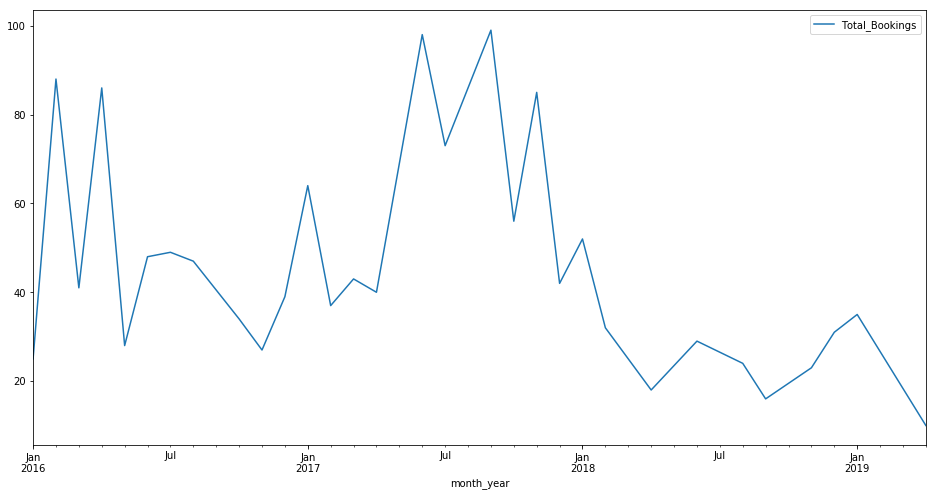

In [15]:
MIAVB_Confirm.plot(figsize=(16, 8))
plt.show()

<Figure size 432x288 with 0 Axes>

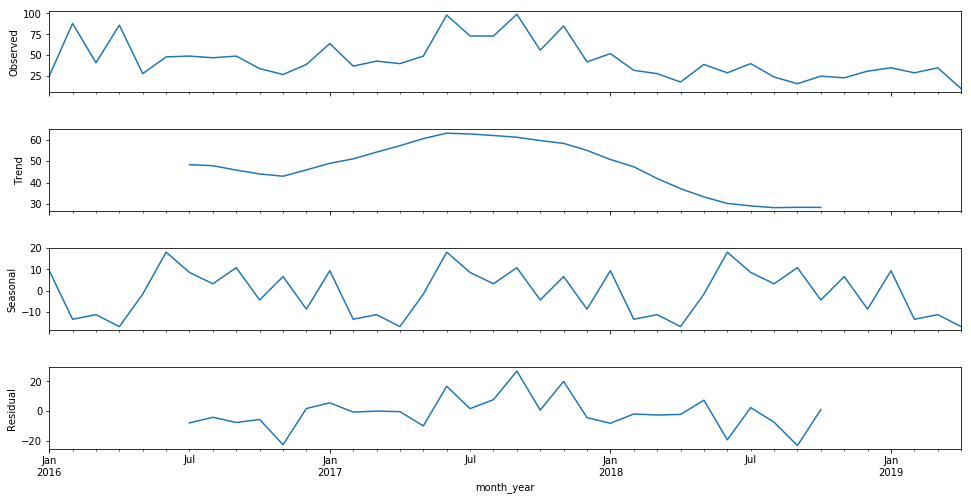

In [22]:
df1=MIAVB_Confirm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['Total_Bookings'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
result = adfuller(df1['Total_Bookings'])

In [21]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.259480411132577
p-value : 0.18536941203666568
#Lags Used : 5
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [0]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
df1['First']=df1.Total_Bookings-df1.Total_Bookings.shift(1)

In [24]:
adf_check(df1['Total_Bookings'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.259480411132577
p-value : 0.18536941203666568
#Lags Used : 5
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
adf_check(df1['First'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.340863045596018
p-value : 5.92405242751138e-25
#Lags Used : 0
Number of Observations Used : 29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


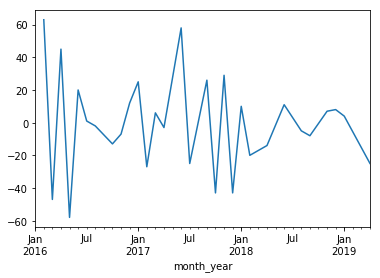

In [26]:
df1['First'].plot()

In [0]:

#df1=df1.drop(['First'], axis=1)
df3=MIAVB_Confirm.Total_Bookings[:'2018-12']
df3=pd.DataFrame(df3)

In [41]:
df3

Total_Bookings
month_year                
2016-01                 25
2016-02                 88
2016-03                 41
2016-04                 86
2016-05                 28
2016-06                 48
2016-07                 49
2016-08                 47
2016-09                 49
2016-10                 34
2016-11                 27
2016-12                 39
2017-01                 64
2017-02                 37
2017-03                 43
2017-04                 40
2017-05                 49
2017-06                 98
2017-07                 73
2017-08                 73
2017-09                 99
2017-10                 56
2017-11                 85
2017-12                 42
2018-01                 52
2018-02                 32
2018-03                 28
2018-04                 18
2018-05                 39
2018-06                 29
2018-07                 40
2018-08                 24
2018-09                 16
2018-10                 25
2018-11                 23
2018-12                 31

In [40]:
MIAVB_Confirm.tail()

Total_Bookings
month_year                
2018-12                 31
2019-01                 35
2019-02                 29
2019-03                 35
2019-04                 10

In [0]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
!pip install pmdarima

    100% |████████████████████████████████| 921kB 21.2MB/s 


In [27]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df3.Total_Bookings, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=325.886, BIC=332.220, Fit time=0.133 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=330.047, BIC=333.214, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=328.083, BIC=332.834, Fit time=0.035 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=330.087, BIC=334.837, Fit time=0.124 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=320.647, BIC=328.565, Fit time=0.073 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=318.872, BIC=325.206, Fit time=0.044 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=319.230, BIC=328.731, Fit time=0.156 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=320.527, BIC=328.445, Fit time=0.073 seconds
Total fit time: 0.650 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observa

In [57]:
df1.tail()

Total_Bookings
month_year                
2018-09                 16
2018-11                 23
2018-12                 31
2019-01                 35
2019-04                 10

In [28]:
# We have seasonal data!
model = SARIMAX(df3.Total_Bookings,order=(2,0,0),seasonal_order=(0,0,0,1))
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:         Total_Bookings   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -157.885
Date:                Sun, 28 Apr 2019   AIC                            321.769
Time:                        15:45:27   BIC                            326.520
Sample:                    01-31-2016   HQIC                           323.428
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2506      0.126      1.992      0.046       0.004       0.497
ar.L2          0.7009      0.112      6.255      0.000       0.481       0.921
sigma2       351.5476     81.580      4.309      0.0

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2019-01'),end=pd.to_datetime('2019-04'), dynamic=True)
pred_ci = pred.conf_int()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


In [0]:
s_forecasted = pred.predicted_mean
s_forecasted=pd.DataFrame(s_forecasted)
s_forecasted.columns = ['pred_bookings']

s_truth = MIAVB_Confirm['2019-01':]

In [43]:
s_truth

Total_Bookings
month_year                
2019-01                 35
2019-02                 29
2019-03                 35
2019-04                 10

In [44]:
df1.tail()

Total_Bookings
month_year                
2018-12                 31
2019-01                 35
2019-02                 29
2019-03                 35
2019-04                 10

In [45]:
s_forecasted

pred_bookings
2019-01      23.888206
2019-02      27.713465
2019-03      23.687266
2019-04      25.359579

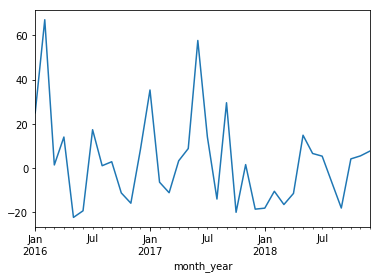

In [34]:
results.resid.plot()

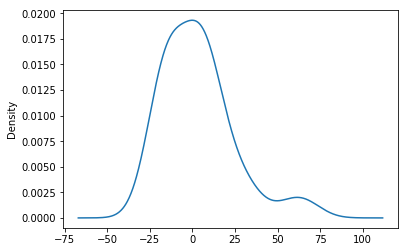

In [35]:
results.resid.plot(kind='kde')

In [36]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#    acf1 = acf(fc-test)[1] 
#    acf1=acf(s_forecasted['pred_bookings']-s_truth['Total_Bookings'])                     # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(s_forecasted['pred_bookings'],s_truth['Total_Bookings'])

{'corr': -0.3068282282770398,
 'mae': 9.767660532526168,
 'mape': 0.5552554961567377,
 'me': -2.087870980450215,
 'minmax': 0.3226839407616452,
 'mpe': 0.21272345905085754,
 'rmse': 11.056918282692969}